# Module 5 Exercises - Time Series

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consecutive days (1 week) starting from the variable with today's date.

In [1]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [3]:
date = np.array('2019-10-09', dtype=np.datetime64)
date

array('2019-10-09', dtype='datetime64[D]')

In [6]:
date + np.arange(7)

array(['2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
       '2019-10-13', '2019-10-14', '2019-10-15'], dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [8]:
#make index using timestamp
index = pd.DatetimeIndex(['2016-02-11', '2016-07-01', '2016-07-09', '2016-10-08', '2017-02-18', '2017-02-25', '2017-05-02', '2017-08-26', '2017-12-15','2018-02-11'])

data = pd.Series([0,1,2,3,4,5,6,7,8,9], index=index) #a series is a singular column from a dataframe
data

2016-02-11    0
2016-07-01    1
2016-07-09    2
2016-10-08    3
2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
2018-02-11    9
dtype: int64

In [9]:
data['2017']

2017-02-18    4
2017-02-25    5
2017-05-02    6
2017-08-26    7
2017-12-15    8
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [10]:
#will convert different formats into datetime
dates = pd.to_datetime([datetime(2017, 12, 15), '4th of October 2016', '20180211', '2017-02-25', '2019-Jan-16'])
dates

DatetimeIndex(['2017-12-15', '2016-10-04', '2018-02-11', '2017-02-25',
               '2019-01-16'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [12]:
#make range using hourly frequency
#default start at 00:00 (midnight)
pd.date_range('2019-10-09', periods=5, freq='1H45T')

DatetimeIndex(['2019-10-09 00:00:00', '2019-10-09 01:45:00',
               '2019-10-09 03:30:00', '2019-10-09 05:15:00',
               '2019-10-09 07:00:00'],
              dtype='datetime64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a time delta range with 20 business days starting from today's date.

In [13]:
#create business day offsets
from pandas.tseries.offsets import BDay

pd.date_range('2019-10-09', periods=20, freq=BDay())

DatetimeIndex(['2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14',
               '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-28', '2019-10-29', '2019-10-30',
               '2019-10-31', '2019-11-01', '2019-11-04', '2019-11-05'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Then using pandas, read the file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [14]:
import numpy as np
import pandas as pd

In [22]:
location = "datasets/smalltravel.csv"
df = pd.read_csv(location)

In [23]:
df.head()

,Date,GoingTo,AvgSpeed,MovingTime
0,2012-01-06,Home,78.3,36.3
1,2012-01-06,GSK,81.8,34.9
2,2012-01-04,Home,82.0,35.9
3,2012-01-04,GSK,74.2,35.6
4,2012-01-03,Home,83.4,34.8


In [24]:
df['AvgSpeed'].mean()

74.47756097560978

In [25]:
#make dates the index
#format dates as we load the data
data = pd.read_csv('datasets/smalltravel.csv', index_col="Date", parse_dates=True)
data.head()

,GoingTo,AvgSpeed,MovingTime
Date,,,
2012-01-06,Home,78.3,36.3
2012-01-06,GSK,81.8,34.9
2012-01-04,Home,82.0,35.9
2012-01-04,GSK,74.2,35.6
2012-01-03,Home,83.4,34.8


In [26]:
data.describe()

,AvgSpeed,MovingTime
count,205.000000,205.000000
mean,74.477561,37.871707
std,11.409816,4.835072
min,38.100000,27.100000
25%,68.900000,35.700000
50%,73.600000,37.600000
75%,79.900000,39.900000
max,107.700000,62.400000


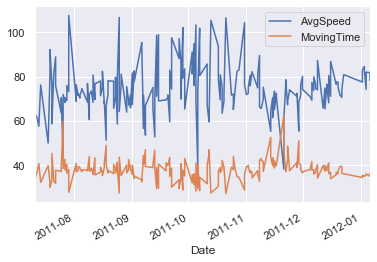

In [27]:
#bar plot of data
data.plot()

In [28]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = data.resample('W').sum()
weekly.head()

,AvgSpeed,MovingTime
Date,,
2011-07-17,258.1,142.8
2011-07-24,604.9,281.7
2011-07-31,714.1,396.3
2011-08-07,579.2,306.1
2011-08-14,719.6,383.5


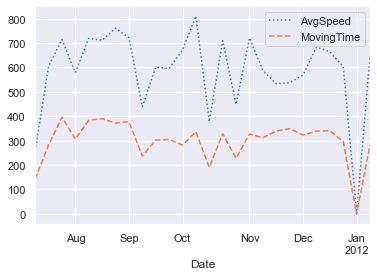

In [30]:
weekly.plot(style=[':', '--']) #line styles for each feature

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

In [31]:
#What does bike usage look like by day of the week?
by_weekday = data.groupby(data.index.dayofweek).mean()

by_weekday

,AvgSpeed,MovingTime
Date,,
0,73.197436,38.146154
1,73.781250,38.427083
2,72.229787,39.085106
3,74.365909,37.418182
4,81.659259,35.114815


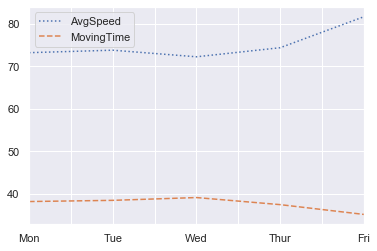

In [33]:
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
by_weekday.plot(style=[':','--','-'])